In [15]:
import pandas as pd
import numpy as np


data = pd.read_csv("UK_Accident.csv")




In [17]:
data.to_csv("Cleaned_UK_Accidents.csv", index=False)


In [19]:
import pandas as pd
from datetime import datetime

data = pd.read_csv('Cleaned_UK_Accidents.csv')

def parse_date(date):
    # Try parsing with various formats
    for fmt in ('%d/%m/%Y', '%d/%m/%y', '%d-%m-%Y', '%d-%m-%y'):
        try:
            return datetime.strptime(date, fmt).strftime('%d/%m/%Y')
        except ValueError:
            continue
    return None  

data['Date'] = data['Date'].apply(parse_date)


null_dates = data[data['Date'].isnull()]
if not null_dates.empty:
    print("Warning: Some dates could not be parsed.")
    print(null_dates)


data.to_csv('Cleaned_UK_Accidents.csv', index=False)

print("Date column standardized successfully!")


Date column standardized successfully!


In [21]:

data['Time'] = pd.to_datetime(data['Time'], format='%H:%M', errors='coerce').dt.time
data.to_csv("Cleaned_UK_Accidents.csv", index=False)


In [23]:


# Strip leading and trailing spaces in 'Road_Type' and convert to lowercase
data['Road_Type'] = data['Road_Type'].str.strip().str.lower()

# Define the mapping for road types
road_type_mapping = {
    'single carriageway': 'Single', 
    'dual carriageway': 'Dual', 
    'roundabout': 'Roundabout',
    'one way street': 'One-way',  # Handle the specific case seen in the data
    'slip road': 'Slip', 
    'unknown': 'Unknown'
}

# Apply the mapping to the 'Road_Type' column
data['Road_Type'] = data['Road_Type'].map(road_type_mapping)

# Fill NaN values with 'Unknown' if there are any missing values
data['Road_Type'].fillna('Unknown', inplace=True)

# Save the cleaned dataset
data.to_csv("Cleaned_UK_Accidents.csv", index=False)



/var/folders/r0/kmkzmgh52q9f32w030w6nl_h0000gn/T/ipykernel_65909/1053594077.py:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Road_Type'].fillna('Unknown', inplace=True)


In [179]:
# Save the data to the new file
data.to_csv('time_data_road_cleaned.csv', index=False)


In [10]:
import pandas as pd
data = pd.read_csv("Cleaned_UK_Accidents.csv")

# Track the initial number of rows
initial_rows = data.shape[0]
print(f"Initial number of rows: {initial_rows}")


data['Weather_Conditions'] = data['Weather_Conditions'].fillna('Unknown')


data = data.dropna(subset=['Longitude', 'Latitude'])


final_rows = data.shape[0]
print(f"Final number of rows after dropping missing values: {final_rows}")


missing_values = data.isnull().sum()
print("Remaining Missing Values:\n", missing_values)

data.to_csv("Cleaned_UK_Accidents.csv", index=False)

# Print summary of rows removed
rows_removed = initial_rows - final_rows
print(f"Number of rows removed: {rows_removed}")
print("Missing values handled successfully, and file saved.")


Initial number of rows: 1048474
Final number of rows after dropping missing values: 1048474
Remaining Missing Values:
 Unnamed: 0                                           0
Accident_Index                                       0
Longitude                                            0
Latitude                                             0
Accident_Severity                                    0
Number_of_Vehicles                                   0
Number_of_Casualties                                 0
Date                                                 0
Day_of_Week                                          0
Time                                           1048474
Road_Type                                            0
Speed_limit                                          0
Junction_Control                                     0
Pedestrian_Crossing-Human_Control                   17
Pedestrian_Crossing-Physical_Facilities             33
Light_Conditions                                     0
W

In [12]:
data.to_csv("Cleaned_UK_Accidents.csv", index=False)

/var/folders/r0/kmkzmgh52q9f32w030w6nl_h0000gn/T/ipykernel_60187/731934349.py:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Junction_Control'].fillna('Unknown', inplace=True)


In [26]:
import pandas as pd
pd.set_option('display.max_columns', None)

data=pd.read_csv("UK_Accident.csv")
print(data.head())
data=pd.read_csv("Cleaned_UK_Accidents.csv")
print("========================================================================================================================================\n================================================================= \n =================================================================")
print(data.head())

   Unnamed: 0 Accident_Index  Longitude   Latitude  Accident_Severity  \
0           0  200501BS00001  -0.191170  51.489096                  2   
1           1  200501BS00002  -0.211708  51.520075                  3   
2           2  200501BS00003  -0.206458  51.525301                  3   
3           3  200501BS00004  -0.173862  51.482442                  3   
4           4  200501BS00005  -0.156618  51.495752                  3   

   Number_of_Vehicles  Number_of_Casualties     Date  Day_of_Week   Time  \
0                   1                     1   4/1/05            3  17:42   
1                   1                     1   5/1/05            4  17:36   
2                   2                     1   6/1/05            5   0:15   
3                   1                     1   7/1/05            6  10:35   
4                   1                     1  10/1/05            2  21:13   

            Road_Type  Speed_limit          Junction_Control  \
0  Single carriageway           30      

In [32]:
data.head()


,Accident_Index,Longitude,Latitude,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,Time,Road_Type,Speed_limit,Junction_Control,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Year
0,200501BS00001,-0.191170,51.489096,2,1,1,04/01/2005,3,17:42:00,Single,30,NaN,None within 50 metres,Zebra crossing,Daylight: Street light present,Raining without high winds,Wet/Damp,NaN,NaN,1,Yes,E01002849,2005
1,200501BS00002,-0.211708,51.520075,3,1,1,05/01/2005,4,17:36:00,Dual,30,Automatic traffic signal,None within 50 metres,Pedestrian phase at traffic signal junction,Darkness: Street lights present and lit,Fine without high winds,Dry,NaN,NaN,1,Yes,E01002909,2005
2,200501BS00003,-0.206458,51.525301,3,2,1,06/01/2005,5,00:15:00,Single,30,NaN,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,NaN,NaN,1,Yes,E01002857,2005
3,200501BS00004,-0.173862,51.482442,3,1,1,07/01/2005,6,10:35:00,Single,30,NaN,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,NaN,NaN,1,Yes,E01002840,2005
4,200501BS00005,-0.156618,51.495752,3,1,1,10/01/2005,2,21:13:00,Single,30,NaN,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lighting unknown,Fine without high winds,Wet/Damp,NaN,NaN,1,Yes,E01002863,2005


In [34]:
data['Date'] = pd.to_datetime(data['Date'], format='%d/%m/%Y')
data.to_csv("Cleaned_UK_Accidents.csv", index=False)

In [36]:
data.head()


,Accident_Index,Longitude,Latitude,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,Time,Road_Type,Speed_limit,Junction_Control,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Year
0,200501BS00001,-0.191170,51.489096,2,1,1,2005-01-04,3,17:42:00,Single,30,NaN,None within 50 metres,Zebra crossing,Daylight: Street light present,Raining without high winds,Wet/Damp,NaN,NaN,1,Yes,E01002849,2005
1,200501BS00002,-0.211708,51.520075,3,1,1,2005-01-05,4,17:36:00,Dual,30,Automatic traffic signal,None within 50 metres,Pedestrian phase at traffic signal junction,Darkness: Street lights present and lit,Fine without high winds,Dry,NaN,NaN,1,Yes,E01002909,2005
2,200501BS00003,-0.206458,51.525301,3,2,1,2005-01-06,5,00:15:00,Single,30,NaN,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,NaN,NaN,1,Yes,E01002857,2005
3,200501BS00004,-0.173862,51.482442,3,1,1,2005-01-07,6,10:35:00,Single,30,NaN,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,NaN,NaN,1,Yes,E01002840,2005
4,200501BS00005,-0.156618,51.495752,3,1,1,2005-01-10,2,21:13:00,Single,30,NaN,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lighting unknown,Fine without high winds,Wet/Damp,NaN,NaN,1,Yes,E01002863,2005


In [42]:
print(data.isnull().sum())


Accident_Index                                       0
Longitude                                          101
Latitude                                             0
Accident_Severity                                    0
Number_of_Vehicles                                   0
Number_of_Casualties                                 0
Date                                                 0
Day_of_Week                                          0
Time                                               104
Road_Type                                            0
Speed_limit                                          0
Junction_Control                                426362
Pedestrian_Crossing-Human_Control                   17
Pedestrian_Crossing-Physical_Facilities             34
Light_Conditions                                     0
Weather_Conditions                                   0
Road_Surface_Conditions                              0
Special_Conditions_at_Site                     1022173
Carriagewa

In [50]:

data = data.dropna(subset=['Longitude'])

missing_values_after_dropping = data.isnull().sum()
print("Missing Values After Dropping Rows:\n", missing_values_after_dropping)


Missing Values After Dropping Rows:
 Accident_Index                                       0
Longitude                                            0
Latitude                                             0
Accident_Severity                                    0
Number_of_Vehicles                                   0
Number_of_Casualties                                 0
Date                                                 0
Day_of_Week                                          0
Time                                               104
Road_Type                                            0
Speed_limit                                          0
Junction_Control                                426296
Pedestrian_Crossing-Human_Control                   17
Pedestrian_Crossing-Physical_Facilities             33
Light_Conditions                                     0
Weather_Conditions                                   0
Road_Surface_Conditions                              0
Special_Conditions_at_Site  

In [48]:
print(data.isnull().sum())

Accident_Index                                       0
Longitude                                          101
Latitude                                             0
Accident_Severity                                    0
Number_of_Vehicles                                   0
Number_of_Casualties                                 0
Date                                                 0
Day_of_Week                                          0
Time                                               104
Road_Type                                            0
Speed_limit                                          0
Junction_Control                                426362
Pedestrian_Crossing-Human_Control                   17
Pedestrian_Crossing-Physical_Facilities             34
Light_Conditions                                     0
Weather_Conditions                                   0
Road_Surface_Conditions                              0
Special_Conditions_at_Site                     1022173
Carriagewa

In [52]:
import pandas as pd

# Load the cleaned dataset
data = pd.read_csv("Cleaned_UK_Accidents.csv")

# Impute missing categorical values with the mode (most frequent value)
data['Weather_Conditions'] = data['Weather_Conditions'].fillna(data['Weather_Conditions'].mode()[0])
data['Road_Type'] = data['Road_Type'].fillna(data['Road_Type'].mode()[0])

# Impute 'Junction_Control' and 'Pedestrian_Crossing' columns with mode (most frequent value)
data['Junction_Control'] = data['Junction_Control'].fillna(data['Junction_Control'].mode()[0])
data['Pedestrian_Crossing-Human_Control'] = data['Pedestrian_Crossing-Human_Control'].fillna(data['Pedestrian_Crossing-Human_Control'].mode()[0])
data['Pedestrian_Crossing-Physical_Facilities'] = data['Pedestrian_Crossing-Physical_Facilities'].fillna(data['Pedestrian_Crossing-Physical_Facilities'].mode()[0])

# Impute 'Special_Conditions_at_Site' and 'Carriageway_Hazards' with a default value or drop columns
# Here, we're filling with 'Unknown' or zero as an example for missing values in these columns
data['Special_Conditions_at_Site'] = data['Special_Conditions_at_Site'].fillna('Unknown')
data['Carriageway_Hazards'] = data['Carriageway_Hazards'].fillna('Unknown')

# Impute missing numerical values for 'Longitude', 'Latitude', and 'Speed_limit' with mean or median
data['Longitude'] = data['Longitude'].fillna(data['Longitude'].mean())
data['Latitude'] = data['Latitude'].fillna(data['Latitude'].mean())
data['Speed_limit'] = data['Speed_limit'].fillna(data['Speed_limit'].median())

# Impute missing 'Time' with a default value (e.g., '00:00' if no time is recorded)
data['Time'] = data['Time'].fillna('00:00')

# Impute 'LSOA_of_Accident_Location' with the mode (since it's a categorical field, treating it as a categorical imputation)
data['LSOA_of_Accident_Location'] = data['LSOA_of_Accident_Location'].fillna(data['LSOA_of_Accident_Location'].mode()[0])

# For columns with no missing values, we don’t need to impute, but let’s double-check if there are any other missing values
missing_values = data.isnull().sum()
print(f"Remaining Missing Values:\n{missing_values}")

# Save the cleaned dataset back to a CSV
data.to_csv("Cleaned_Engineered_UK_Accidents.csv", index=False)
print("Missing values handled successfully, and file saved.")


Remaining Missing Values:
Accident_Index                                 0
Longitude                                      0
Latitude                                       0
Accident_Severity                              0
Number_of_Vehicles                             0
Number_of_Casualties                           0
Date                                           0
Day_of_Week                                    0
Time                                           0
Road_Type                                      0
Speed_limit                                    0
Junction_Control                               0
Pedestrian_Crossing-Human_Control              0
Pedestrian_Crossing-Physical_Facilities        0
Light_Conditions                               0
Weather_Conditions                             0
Road_Surface_Conditions                        0
Special_Conditions_at_Site                     0
Carriageway_Hazards                            0
Urban_or_Rural_Area                        

In [58]:
import pandas as pd

data = pd.read_csv("Cleaned_UK_Accidents.csv")

data['Date'] = pd.to_datetime(data['Date'], errors='coerce')  
data['Date'] = data['Date'].dt.strftime('%d-%m-%Y')  

data['Month'] = pd.to_datetime(data['Date'], format='%d-%m-%Y').dt.month
data['Day_of_Year'] = pd.to_datetime(data['Date'], format='%d-%m-%Y').dt.dayofyear
data['Weekday'] = pd.to_datetime(data['Date'], format='%d-%m-%Y').dt.weekday
data['Year'] = pd.to_datetime(data['Date'], format='%d-%m-%Y').dt.year

data['Time'] = data['Time'].fillna('00:00:00')  

data['Time'] = data['Time'].str[:8]  
data['Hour'] = pd.to_datetime(data['Time'], format='%H:%M:%S').dt.strftime('%H')  # Extract hour
data['Minute'] = pd.to_datetime(data['Time'], format='%H:%M:%S').dt.strftime('%M')  # Extract minute
data['Second'] = pd.to_datetime(data['Time'], format='%H:%M:%S').dt.strftime('%S')  # Extract second

print(data[['Date', 'Time', 'Month', 'Day_of_Year', 'Weekday', 'Year', 'Hour', 'Minute', 'Second']].head())

data.to_csv("Cleaned_Engineered_UK_Accidents.csv", index=False)

print("New features extracted and file saved.")


         Date      Time  Month  Day_of_Year  Weekday  Year Hour Minute Second
0  04-01-2005  17:42:00      1            4        1  2005   17     42     00
1  05-01-2005  17:36:00      1            5        2  2005   17     36     00
2  06-01-2005  00:15:00      1            6        3  2005   00     15     00
3  07-01-2005  10:35:00      1            7        4  2005   10     35     00
4  10-01-2005  21:13:00      1           10        0  2005   21     13     00
New features extracted and file saved.


In [60]:
data = data.drop(columns=['Day_of_Year'])

data.to_csv("Cleaned_Engineered_UK_Accidents_Updated.csv", index=False)

print("Day_of_Year column dropped and file saved.")

Day_of_Year column dropped and file saved.


In [62]:
import pandas as pd

data = pd.get_dummies(data, columns=[, 'Accident_Severity'])

data.to_csv('encoded_data.csv', index=False)


In [64]:
import pandas as pd

data = pd.get_dummies(data, columns=['Junction_Control', 'Pedestrian_Crossing-Human_Control', 
                                      'Pedestrian_Crossing-Physical_Facilities', 'Light_Conditions', 
                                      'Road_Surface_Conditions'])

data.to_csv('encoded_data.csv', index=False)


In [66]:
import pandas as pd


data = pd.get_dummies(data, columns=[])

data.to_csv('encoded_data.csv', index=False)


In [68]:
import pandas as pd

total_rows, total_columns = data.shape


print(f"Total rows: {total_rows}")
print(f"Total columns: {total_columns}")


Total rows: 1048474
Total columns: 72


In [72]:
!pip install geopy

import pandas as pd
from geopy.distance import geodesic

# Assuming 'data' is your DataFrame and has 'Latitude' and 'Longitude' columns
# Example of reference point: Latitude and Longitude of London city center
reference_point = (51.5074, -0.1278)  # Latitude, Longitude of London city center

# Calculate distance from the reference point for each row in the DataFrame
data['Distance_from_Center'] = data.apply(lambda row: geodesic(reference_point, (row['Latitude'], row['Longitude'])).km, axis=1)

# Save the updated DataFrame with the 'Distance_from_Center' column
data.to_csv('data_with_distance.csv', index=False)

# Display the first few rows to check
print(data.head())


  Accident_Index  Longitude   Latitude  Number_of_Vehicles  \
0  200501BS00001  -0.191170  51.489096                   1   
1  200501BS00002  -0.211708  51.520075                   1   
2  200501BS00003  -0.206458  51.525301                   2   
3  200501BS00004  -0.173862  51.482442                   1   
4  200501BS00005  -0.156618  51.495752                   1   

   Number_of_Casualties        Date  Day_of_Week      Time  Speed_limit  \
0                     1  04-01-2005            3  17:42:00           30   
1                     1  05-01-2005            4  17:36:00           30   
2                     1  06-01-2005            5  00:15:00           30   
3                     1  07-01-2005            6  10:35:00           30   
4                     1  10-01-2005            2  21:13:00           30   

   Urban_or_Rural_Area Did_Police_Officer_Attend_Scene_of_Accident  \
0                    1                                         Yes   
1                    1              

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 4.7 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 11.3 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 1.1 MB/s eta 0:00:00ta 0:00:01
Summary Statistics for Numerical Columns:
          Longitude      Latitude  Accident_Severity  Number_of_Vehicles  \
count  1.048474e+06  1.048474e+06       1.048474e+06        1.048474e+06   
mean  -1.451933e+00  5.258636e+01       2.841090e+00        1.832606e+00   
std    1.404224e+00  1.452868e+00       4.007895e-01        7.164668e-01   
min   -7.516225e+00  4.991449e+01       1.000000e+00        1.000000e+00   
25%   -2.385540e+00  5.149333e+01       3.000000e+00        1.000000e+00   
50%   -1.420841e+00  5.230997e+01       3.000000e+00        2.000000e+00   
75%   -2.239450e-01  5.346996e+01       3.000000e+00        2.000000e+00   
max    1.759398e+00  6.075754e+01       3.000000e+00        3.400000e+01   

       Number_

/var/folders/r0/kmkzmgh52q9f32w030w6nl_h0000gn/T/ipykernel_80001/3694348968.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Accident_Severity', data=data, palette='Set2')


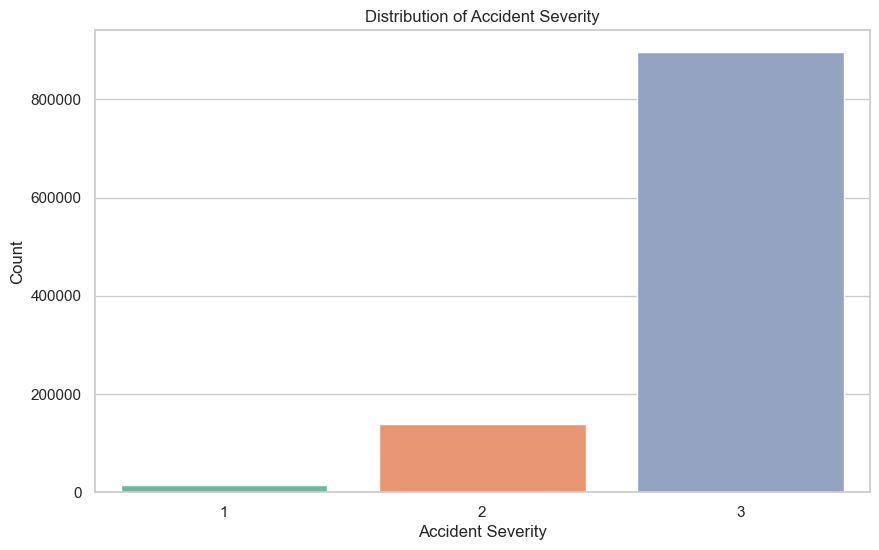

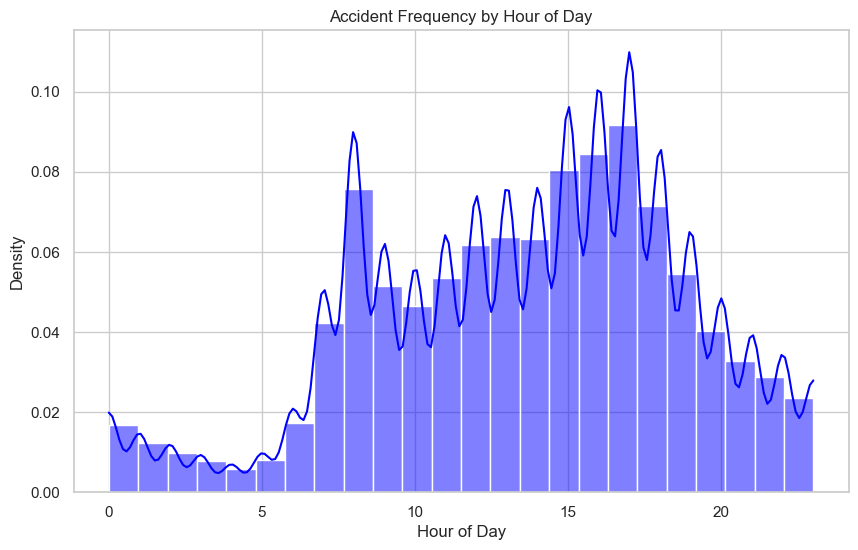

/var/folders/r0/kmkzmgh52q9f32w030w6nl_h0000gn/T/ipykernel_80001/3694348968.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Weather_Conditions', data=data, palette='viridis', order=data['Weather_Conditions'].value_counts().index)


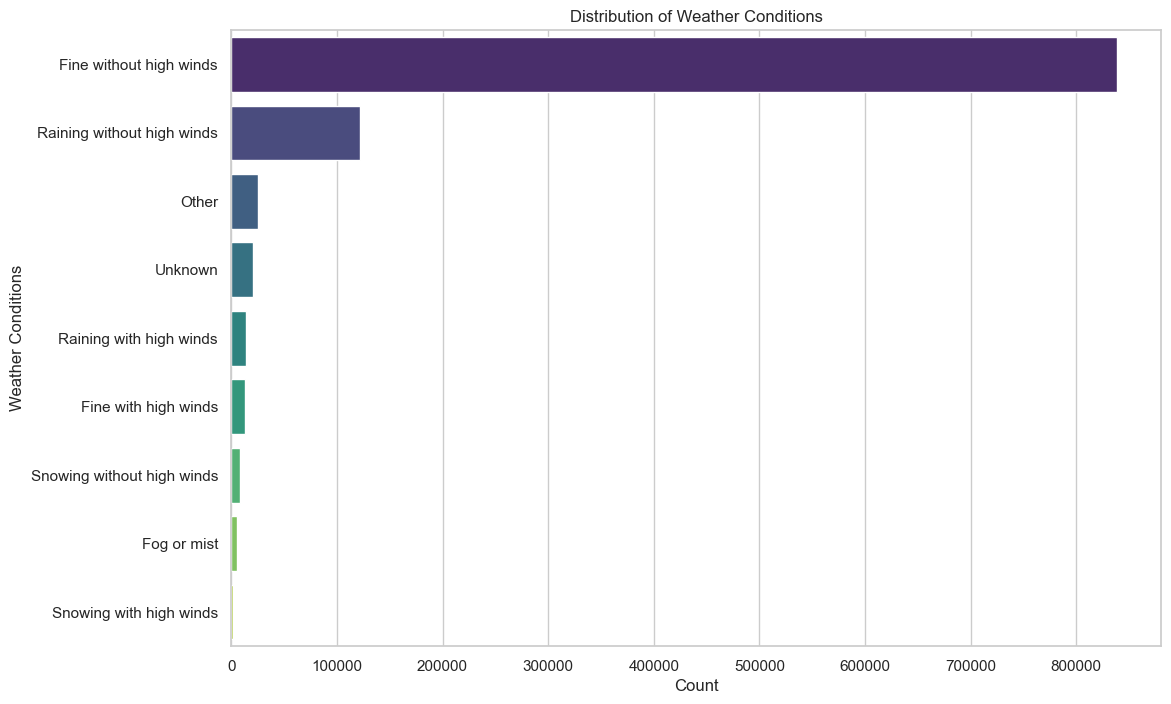

AttributeError: Can only use .dt accessor with datetimelike values

<Figure size 1000x600 with 0 Axes>

In [76]:
!pip install geopandas

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import HeatMap
import geopandas as gpd
from sklearn.neighbors import KernelDensity

# Load the cleaned dataset
data = pd.read_csv("Cleaned_Engineered_UK_Accidents.csv")

# Set seaborn style for better visuals
sns.set(style="whitegrid")

# Basic Statistics
print("Summary Statistics for Numerical Columns:")
print(data.describe())

# 1. Visualize the Distribution of Accident Severity, Time of Day, and Weather Conditions

# Accident Severity Distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='Accident_Severity', data=data, palette='Set2')
plt.title('Distribution of Accident Severity')
plt.xlabel('Accident Severity')
plt.ylabel('Count')
plt.show()

# Time of Day (Hour) Distribution
plt.figure(figsize=(10, 6))
sns.histplot(data['Hour'], bins=24, kde=True, color='blue', stat='density')
plt.title('Accident Frequency by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Density')
plt.show()

# Weather Conditions Distribution
plt.figure(figsize=(12, 8))
sns.countplot(y='Weather_Conditions', data=data, palette='viridis', order=data['Weather_Conditions'].value_counts().index)
plt.title('Distribution of Weather Conditions')
plt.xlabel('Count')
plt.ylabel('Weather Conditions')
plt.show()

# 2. Accident Density Over Time

# Monthly Accident Trend
plt.figure(figsize=(10, 6))
data['Month'] = data['Date'].dt.month
sns.countplot(x='Month', data=data, palette='Set1')
plt.title('Monthly Accident Trend')
plt.xlabel('Month')
plt.ylabel('Number of Accidents')
plt.show()

# Yearly Accident Trend
plt.figure(figsize=(10, 6))
sns.countplot(x='Year', data=data, palette='Set2')
plt.title('Yearly Accident Trend')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.show()

# 3. Geospatial Analysis

# Create a base map centered around the UK
m = folium.Map(location=[51.5074, -0.1278], zoom_start=6)

# Plotting accident locations on the map using latitude and longitude
accident_data = data.dropna(subset=['Longitude', 'Latitude'])
locations = accident_data[['Latitude', 'Longitude']].values
for lat, lon in locations:
    folium.CircleMarker(location=[lat, lon], radius=2, color='red', fill=True, fill_color='red').add_to(m)

# Save the map as an HTML file
m.save('accident_map.html')

# 4. Heatmaps of Accident Locations using Folium
m = folium.Map(location=[51.5074, -0.1278], zoom_start=6)

# Plotting heatmap using Folium
HeatMap(accident_data[['Latitude', 'Longitude']].dropna().values, radius=10).add_to(m)

# Save the heatmap to an HTML file
m.save('accident_heatmap.html')

# 5. Kernel Density Estimation (KDE) for Accident Location Density

# Prepare data for KDE
kde_data = accident_data[['Longitude', 'Latitude']].dropna()

# KDE Estimation
kde = KernelDensity(kernel='gaussian', bandwidth=0.01).fit(kde_data)
grid_x, grid_y = np.meshgrid(np.linspace(kde_data['Longitude'].min(), kde_data['Longitude'].max(), 100),
                             np.linspace(kde_data['Latitude'].min(), kde_data['Latitude'].max(), 100))
grid_points = np.vstack([grid_x.ravel(), grid_y.ravel()]).T
log_density = kde.score_samples(grid_points)
density = np.exp(log_density).reshape(grid_x.shape)

# Plotting the KDE map
plt.figure(figsize=(10, 6))
plt.contourf(grid_x, grid_y, density, levels=20, cmap='YlOrRd')
plt.title('Kernel Density Estimation of Accident Locations')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.colorbar(label='Density')
plt.show()


/var/folders/r0/kmkzmgh52q9f32w030w6nl_h0000gn/T/ipykernel_80001/720990717.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Accident_Severity', data=data, palette='Set2')


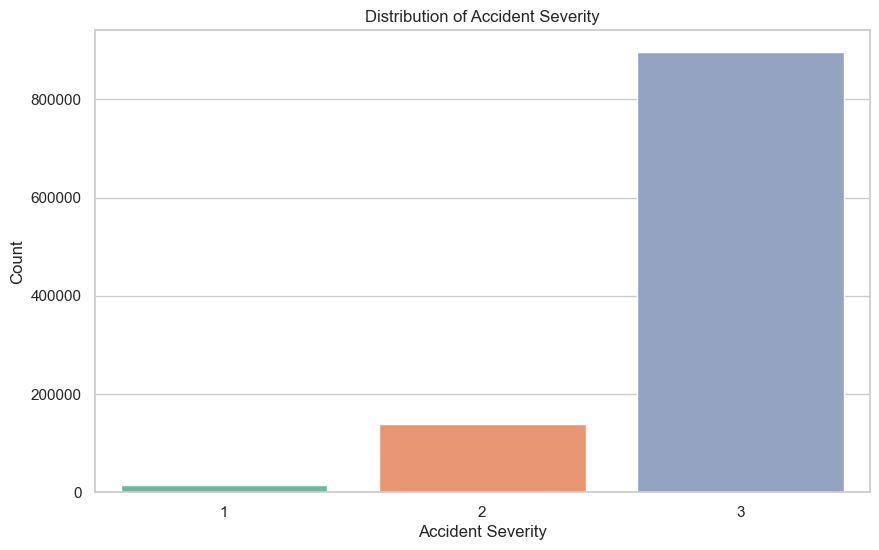

In [94]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import HeatMap
import geopandas as gpd
from sklearn.neighbors import KernelDensity

# Load the cleaned dataset
data = pd.read_csv("Cleaned_Engineered_UK_Accidents.csv")

# Set seaborn style for better visuals
sns.set(style="whitegrid")


# 1. Visualize the Distribution of Accident Severity, Time of Day, and Weather Conditions

# Accident Severity Distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='Accident_Severity', data=data, palette='Set2')
plt.title('Distribution of Accident Severity')
plt.xlabel('Accident Severity')
plt.ylabel('Count')
plt.show()


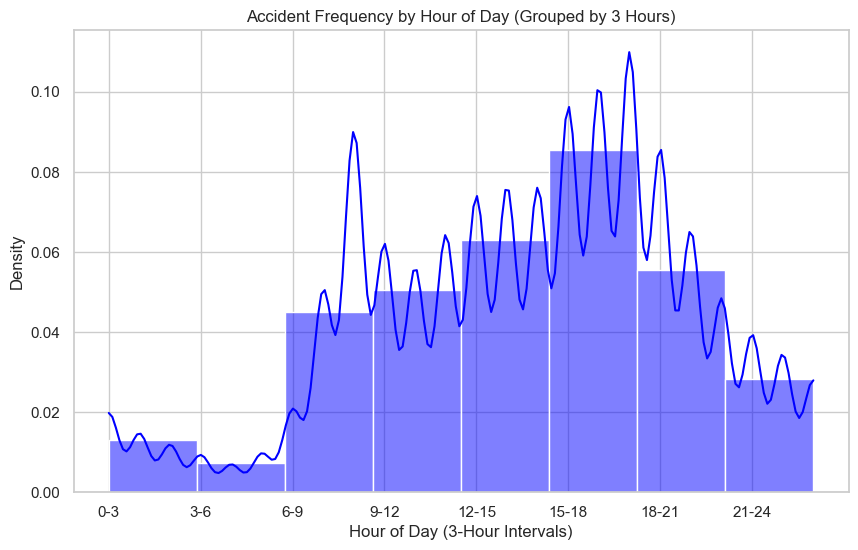

In [120]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the histogram with 3-hour intervals
plt.figure(figsize=(10, 6))

# Use the 'Hour' column to create the histogram, and set bins such that each bin represents a 3-hour interval
sns.histplot(data['Hour'], bins=8, kde=True, color='blue', stat='density')

# Customize the plot
plt.title('Accident Frequency by Hour of Day (Grouped by 3 Hours)')
plt.xlabel('Hour of Day (3-Hour Intervals)')
plt.ylabel('Density')

# Set the x-ticks to show every 3-hour interval
plt.xticks(range(0, 24, 3), labels=[f'{x}-{x+3}' for x in range(0, 24, 3)])

plt.show()


/var/folders/r0/kmkzmgh52q9f32w030w6nl_h0000gn/T/ipykernel_80001/1305456186.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Day_of_Week', data=data, palette='Set1')


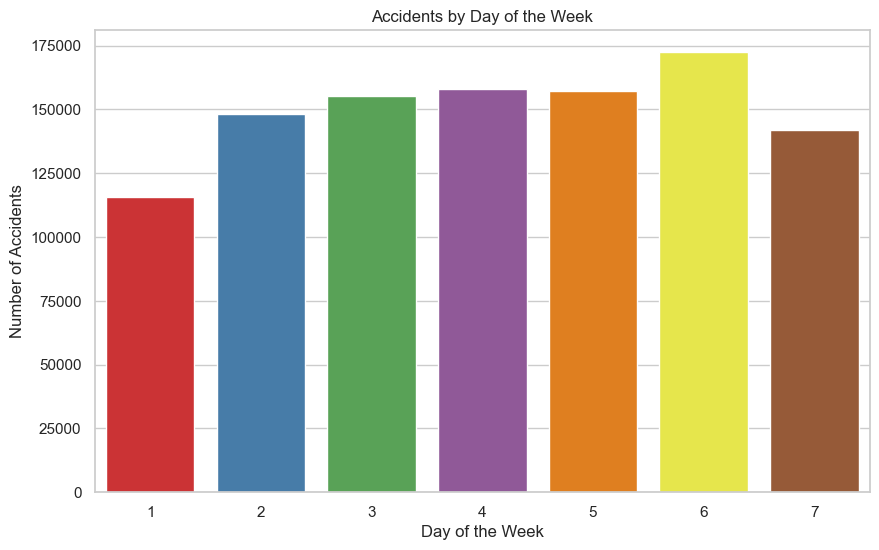

In [122]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Day_of_Week', data=data, palette='Set1')
plt.title('Accidents by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Accidents')
plt.show()


/var/folders/r0/kmkzmgh52q9f32w030w6nl_h0000gn/T/ipykernel_80001/2325854856.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Month', data=data, palette='Set1')


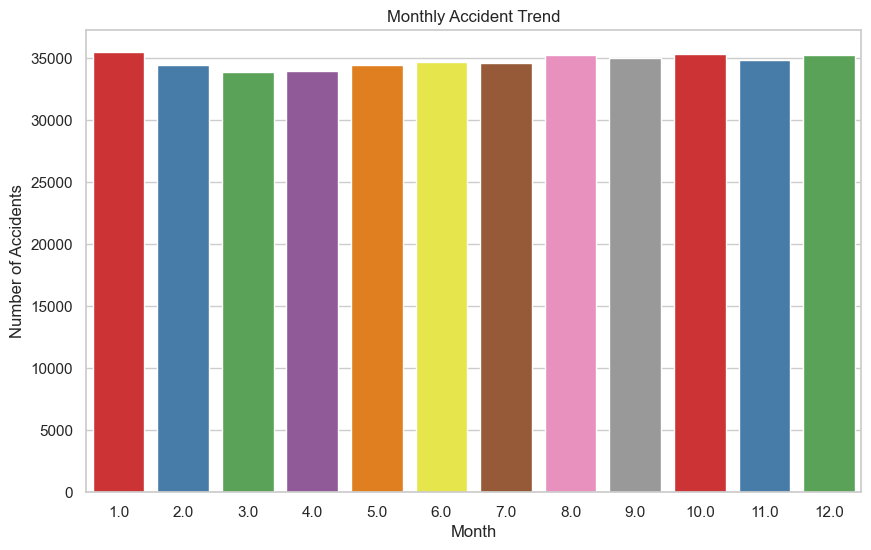

In [106]:
# 2. Accident Density Over  TIME

# Monthly Accident Trend


plt.figure(figsize=(10, 6))
data['Month'] = data['Date'].dt.month
sns.countplot(x='Month', data=data, palette='Set1')
plt.title('Monthly Accident Trend')
plt.xlabel('Month')
plt.ylabel('Number of Accidents')
plt.show()

/var/folders/r0/kmkzmgh52q9f32w030w6nl_h0000gn/T/ipykernel_80001/3053732548.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Year', data=data, palette='viridis')


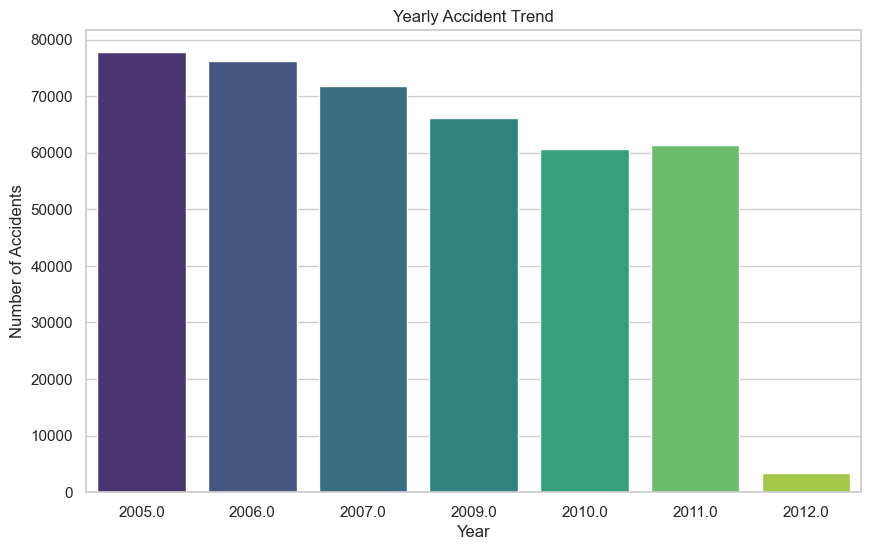

In [90]:
# Yearly Accident Trend
plt.figure(figsize=(10, 6))
sns.countplot(x='Year', data=data, palette='viridis')
plt.title('Yearly Accident Trend')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.show()



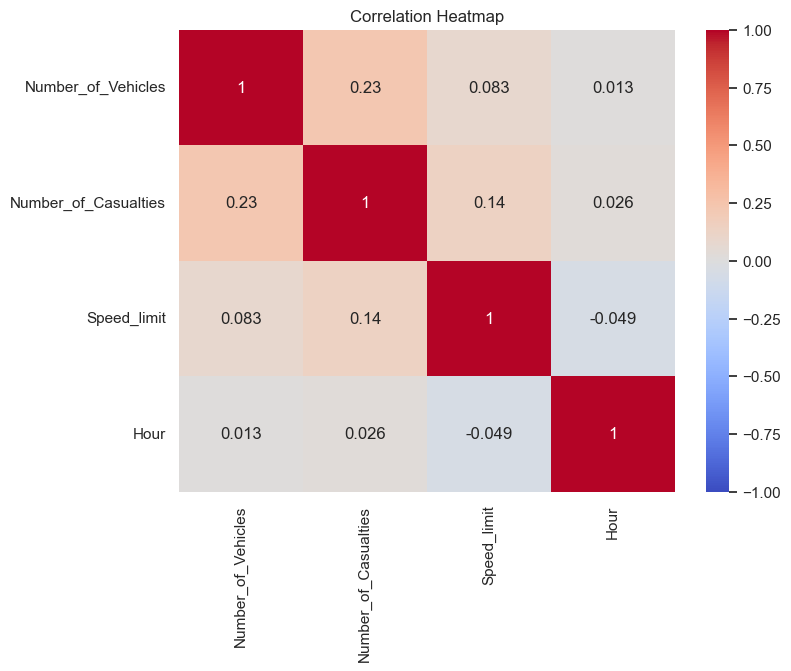

In [130]:
# Selecting relevant numeric columns for correlation
numeric_columns = ['Number_of_Vehicles', 'Number_of_Casualties', 'Speed_limit', 'Hour']

# Correlation matrix
corr_matrix = data[numeric_columns].corr()

# Plotting the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()


/var/folders/r0/kmkzmgh52q9f32w030w6nl_h0000gn/T/ipykernel_80001/425021035.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Hour', data=data, palette='coolwarm')


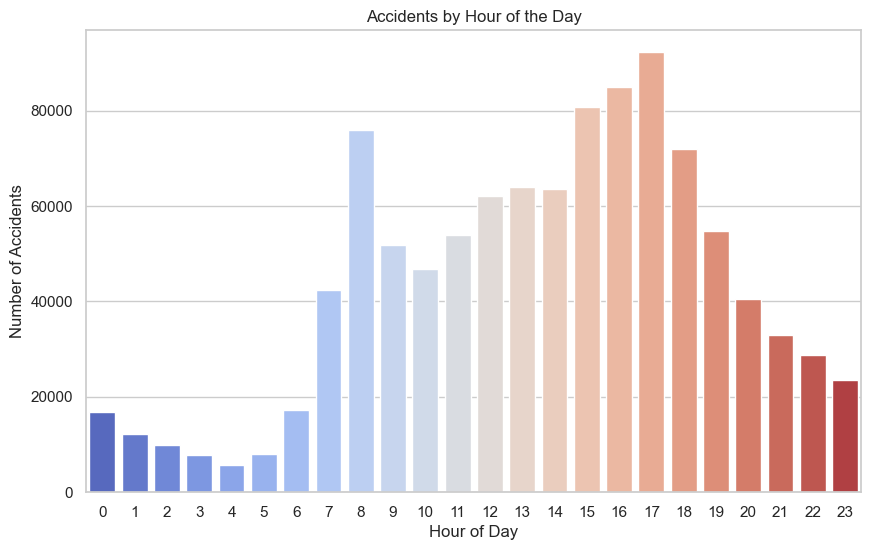

In [132]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Hour', data=data, palette='coolwarm')
plt.title('Accidents by Hour of the Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Accidents')
plt.xticks(range(0, 24, 1))
plt.show()


In [153]:
import pandas as pd
import folium
from folium.plugins import MarkerCluster

# Step 1: Load the accident data from the CSV file
accident_data = pd.read_csv('encoded_data.csv')  # Ensure the path to your file is correct

# Step 2: Select only the first 100,000 rows
accident_data = accident_data.head(100000)

# Step 3: Print the column names to verify
print(accident_data.columns)

# Step 4: Clean the data (drop rows with missing latitude or longitude)
accident_data_clean = accident_data.dropna(subset=['Latitude', 'Longitude'])

# Step 5: Initialize the map
m = folium.Map(location=[accident_data_clean['Latitude'].mean(), accident_data_clean['Longitude'].mean()], zoom_start=12)

# Step 6: Add a MarkerCluster to group markers together
marker_cluster = MarkerCluster().add_to(m)

# Step 7: Add accident markers to the map
for index, row in accident_data_clean.iterrows():
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=f"Accident ID: {row['Accident_Index']}",  # Customize popup with additional details if needed
        icon=folium.Icon(color='red')  # Customize the icon color
    ).add_to(marker_cluster)

# Step 8: Save the map as an HTML file
m.save("accident_map.html")

# Output message to confirm map is saved
print("Accident map saved as 'accident_map.html'. Open the file in a browser to view the map.")


/var/folders/r0/kmkzmgh52q9f32w030w6nl_h0000gn/T/ipykernel_80001/3037995215.py:6: DtypeWarning: Columns (0,11) have mixed types. Specify dtype option on import or set low_memory=False.
  accident_data = pd.read_csv('encoded_data.csv')  # Ensure the path to your file is correct


Index(['Accident_Index', 'Longitude', 'Latitude', 'Number_of_Vehicles',
       'Number_of_Casualties', 'Date', 'Day_of_Week', 'Time', 'Speed_limit',
       'Urban_or_Rural_Area', 'Did_Police_Officer_Attend_Scene_of_Accident',
       'LSOA_of_Accident_Location', 'Year', 'Month', 'Weekday', 'Hour',
       'Minute', 'Second', 'Weather_Conditions_Fine with high winds',
       'Weather_Conditions_Fine without high winds',
       'Weather_Conditions_Fog or mist', 'Weather_Conditions_Other',
       'Weather_Conditions_Raining with high winds',
       'Weather_Conditions_Raining without high winds',
       'Weather_Conditions_Snowing with high winds',
       'Weather_Conditions_Snowing without high winds',
       'Weather_Conditions_Unknown', 'Road_Type_Dual', 'Road_Type_One-way',
       'Road_Type_Roundabout', 'Road_Type_Single', 'Road_Type_Slip',
       'Road_Type_Unknown', 'Accident_Severity_1', 'Accident_Severity_2',
       'Accident_Severity_3', 'Junction_Control_Authorised person',
     

In [137]:
from folium.plugins import HeatMap

# Create a base map centered around the UK
m = folium.Map(location=[51.5074, -0.1278], zoom_start=6)

# Plotting heatmap using Folium
HeatMap(accident_data[['Latitude', 'Longitude']].dropna().values, radius=10).add_to(m)

# Save the heatmap to an HTML file
m.save('accident_heatmap.html')


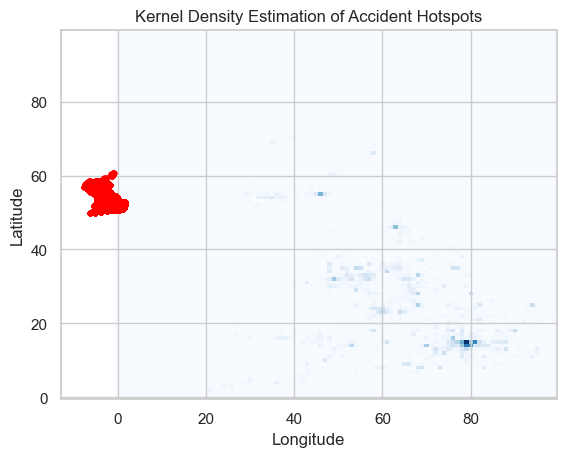

In [140]:
import numpy as np
from sklearn.neighbors import KernelDensity
import matplotlib.pyplot as plt

# KDE Estimation
kde_data = accident_data[['Longitude', 'Latitude']].values  # Make sure to get the relevant columns as a numpy array
kde = KernelDensity(kernel='gaussian', bandwidth=0.01).fit(kde_data)

# Create a grid of points to evaluate the density
grid_x, grid_y = np.meshgrid(np.linspace(kde_data[:, 0].min(), kde_data[:, 0].max(), 100),
                             np.linspace(kde_data[:, 1].min(), kde_data[:, 1].max(), 100))

# Stack the grid points together and evaluate the density at these points
grid_points = np.vstack([grid_x.ravel(), grid_y.ravel()]).T
log_density = kde.score_samples(grid_points)

# Reshape the density scores to match the grid shape
density = np.exp(log_density).reshape(grid_x.shape)

# Plot the density
plt.imshow(density, origin='lower', aspect='auto', cmap='Blues')
plt.scatter(kde_data[:, 0], kde_data[:, 1], color='red', s=10)
plt.title("Kernel Density Estimation of Accident Hotspots")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()


In [157]:
import pandas as pd
import folium
from folium.plugins import MarkerCluster

# Load the dataset
data = pd.read_csv('UK_Accident.csv')

# Check for NaN values in Latitude and Longitude columns
print(data[['Latitude', 'Longitude']].isna().sum())

# Remove rows where Latitude or Longitude is NaN
data_cleaned = data.dropna(subset=['Latitude', 'Longitude'])

# Alternatively, you can fill NaN values with a default value (e.g., average of the column)
# data['Latitude'].fillna(data['Latitude'].mean(), inplace=True)
# data['Longitude'].fillna(data['Longitude'].mean(), inplace=True)

# Sample the first 100,000 rows from your cleaned data
data_sample = data_cleaned.head(100000)

# Create the base map centered around the average latitude and longitude
base_map = folium.Map(location=[data_sample['Latitude'].mean(), data_sample['Longitude'].mean()], zoom_start=12)

# Create a marker cluster
marker_cluster = MarkerCluster().add_to(base_map)

# Add points to the cluster instead of adding them individually
for _, row in data_sample.iterrows():
    folium.CircleMarker(
        location=[row['Latitude'], row['Longitude']],
        radius=5,
        color='red',
        fill=True,
        fill_color='red',
        fill_opacity=0.7,
        popup=f"Accident Severity: {row['Accident_Severity']}<br>Time: {row['Time']}<br>Date: {row['Date']}<br>Road Type: {row['Road_Type']}<br>Junction Control: {row['Junction_Control']}<br>Weather Conditions: {row['Weather_Conditions']}<br>Light Conditions: {row['Light_Conditions']}"
    ).add_to(marker_cluster)

# Save the map as an HTML file
base_map.save('accident_map_with_cluster.html')

print("Map saved as 'accident_map_with_cluster.html'.")


Latitude       0
Longitude    101
dtype: int64
Map saved as 'accident_map_with_cluster.html'.


In [ ]:
from sklearn.cluster import DBSCAN
import numpy as np
import pandas as pd
data = pd.read_csv('encoded_data.csv')
# Select Latitude and Longitude for clustering
coordinates = data[['Latitude', 'Longitude']]

# Apply DBSCAN
# Adjust `eps` (distance threshold) and `min_samples` (minimum points for a cluster)
db = DBSCAN(eps=0.01, min_samples=5, metric='haversine').fit(np.radians(coordinates))

# Add cluster labels to the dataset
accident_data['cluster'] = db.labels_

# View cluster summary
print(accident_data['cluster'].value_counts())

# Separate hotspots and noise
hotspots = accident_data[accident_data['cluster'] != -1]  # Clusters are hotspots
noise = accident_data[accident_data['cluster'] == -1]     # Noise points

print(f"Number of hotspots: {len(hotspots['cluster'].unique())}")
print(f"Number of noise points: {len(noise)}")


/var/folders/r0/kmkzmgh52q9f32w030w6nl_h0000gn/T/ipykernel_97917/2841554894.py:4: DtypeWarning: Columns (0,11) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('encoded_data.csv')
